In [1]:
import os
import glob
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool
from bokeh.layouts import column

In [3]:
base_dir = '/Users/geo/london_bikes/London-bikes-analysis/'
year = "2018"
file = "{}_bikes.csv".format(year)
os.chdir(base_dir)

if os.path.exists(file):
    bikes_df = pd.read_csv(file)
else:
    weekly_files_dir = "data_{}".format(year)
    os.chdir('{}{}'.format('base_dir', 'weekly_files_dir'))
    files_names = [i for i in glob.glob('*.csv')]
    bikes_df = pd.concat([pd.read_csv(file) for file in files_names ]).reset_index(drop=True)
    bikes_df.to_csv( "../{}_bikes.csv".format(year), index=False, encoding='utf-8')

bikes_df.drop(['EndStation Logical Terminal'], axis=1, inplace=True)

In [10]:
bikes_df.columns = ['bike_id',
                    'duration',
                    'end_date',
                    'endstation_id',
                    'endstation_name',
                    'rental_id',
                    'start_date',
                    'startstation_id',
                    'startstation_name']

bikes_df['start_date'] = pd.to_datetime(bikes_df['start_date'], format = '%d/%m/%Y %H:%M')
bikes_df['end_date'] = pd.to_datetime(bikes_df['end_date'], format = '%d/%m/%Y %H:%M')
bikes_df = bikes_df.drop(bikes_df[bikes_df.start_date.dt.year != 2018].index)

In [11]:
print("--- Bike trips dataset:\n", bikes_df.head(5), "\n",
      "--- Shape:\n", bikes_df.shape, "\n",
      "--- Columns:\n", bikes_df.dtypes, "\n")
print("--- Number of bike trips:\n", len(bikes_df))

--- Bike trips dataset:
    bike_id  duration            end_date  endstation_id  \
0     7457      1620 2018-03-10 12:41:00          807.0   
1    10899       180 2018-03-07 15:14:00          446.0   
2     4813      1020 2018-03-08 13:57:00          159.0   
3     8307       240 2018-03-09 08:57:00          578.0   
4     8433       240 2018-03-13 07:00:00          578.0   

                         endstation_name  rental_id          start_date  \
0  Bevington Road West, North Kensington   73768697 2018-03-10 12:14:00   
1               York Hall, Bethnal Green   73703818 2018-03-07 15:11:00   
2         Great Marlborough Street, Soho   73729421 2018-03-08 13:40:00   
3       Hollybush Gardens, Bethnal Green   73749828 2018-03-09 08:53:00   
4       Hollybush Gardens, Bethnal Green   73822143 2018-03-13 06:56:00   

   startstation_id                    startstation_name  
0              647        Richmond Way, Shepherd's Bush  
1              722         Finnis Street, Bethnal Gre

Loading BokehJS ...

Text(0.5, 1.0, '... the month')

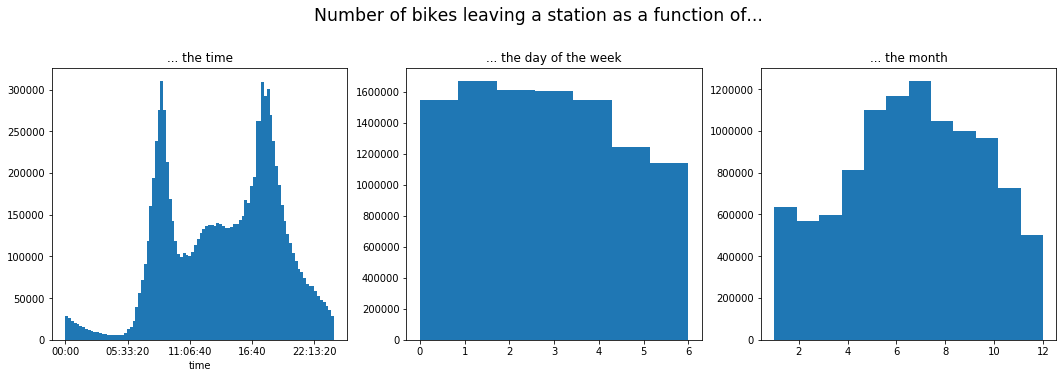

In [70]:
df_hours = bikes_df['start_date'].dt.time
df_weekdays = bikes_df['start_date'].dt.weekday
df_months = bikes_df['start_date'].dt.month

#set up fig and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))
plt.suptitle('Number of bikes leaving a station as a function of...', x=0.5, y=1.05, ha='center', fontsize='xx-large')

axes[0].hist(df_hours, bins=96)
axes[0].set_title('... the time')
axes[1].hist(df_weekdays, bins=7)
axes[1].set_title('... the day of the week')
axes[2].hist(df_months, bins=12)
axes[2].set_title('... the month')

In [64]:
output_notebook()
tools_to_show = 'box_zoom,pan,save,hover,reset,tap,wheel_zoom'

y = bikes_df.groupby(bikes_df['start_date'].rename('Hours').dt.hour).size().tolist()
x = [i for i in range(0, len(y))]
fig1 = figure(title="Number of bikes picked up as a function of the time of the day (whole of 2018)",
             x_axis_label='Hour',
             y_axis_label='Number of bikes',
             plot_width=900,
             plot_height=400,
             tools=tools_to_show,
             tooltips=[("Hour", "$x{int}"),("Number of bikes", "@y{int}")]
          )
fig1.left[0].formatter.use_scientific = False
fig1.line(x, y, line_width=2)

y_weekday = bikes_df.groupby(bikes_df['start_date'].rename('Day of the week').dt.weekday).size().tolist()
x_weekday = [i for i in range(0, len(y_weekday))]
fig2 = figure(title="Number of bikes picked up as a function of the day of the week (whole of 2018)",
             x_axis_label='Day of the week',
             y_axis_label='Number of bikes',
             plot_width=900,
             plot_height=400,
             tools=tools_to_show,
             tooltips=[("Hour", "$x_weekday{int}"),("Number of bikes", "@y_weekday{int}")]
          )
fig2.left[0].formatter.use_scientific = False
fig2.line(x_weekday, y_weekday, line_width=2)

y_month = bikes_df.groupby(bikes_df['start_date'].rename('Month').dt.month).size().tolist()
x_month = [i for i in range(0, len(y_month))]
fig3 = figure(title="Number of bikes picked up as a function of the month (whole of 2018)",
             x_axis_label='Month',
             y_axis_label='Number of bikes',
             plot_width=900,
             plot_height=400,
             tools=tools_to_show,
             tooltips=[("Month", "$x_month{int}"),("Number of bikes", "@y_month{int}")]
          )
fig3.left[0].formatter.use_scientific = False
fig3.line(x_month, y_month, line_width=2)

show(column(fig1, fig2, fig3))

Loading BokehJS ...

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(14,14))

sns.countplot(data = bikes_df[bikes_df['duration'] <= 3600],
              x = 'duration',
              ax = ax1,
              color = 'c').set_title('Number of trips as a function of its duration (duration<1h)', fontsize=12)

sns.countplot(data = bikes_df[(bikes_df['duration'] > 3600) & (bikes_df['duration'] < 7200)],
              x = 'duration',
              ax = ax2,
              color = 'c').set_title('Number of trips as a function of the duration (1h<duration<2h)', fontsize=12)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=70)
plt.show()

In [ ]:
print(bikes_df['duration'].mean())
print(bikes_df['duration'].std())
print(bikes_df['duration'].median())
print(bikes_df[bikes_df['duration'] < 10000].shape)